       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


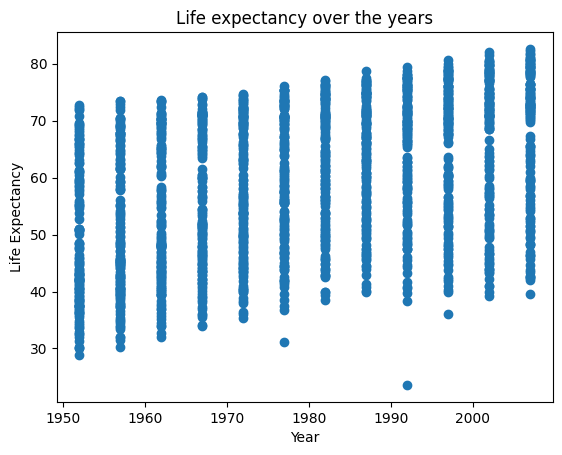

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

file_path = 'data.tsv'

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')
print(df.head())

# Exercise 1
x = df['year']
y = df['lifeExp']

plt.scatter(x, y)
plt.title('Life expectancy over the years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

**Question 1**: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

There is a general trend where life expectancy is increasing over time linearly

**Question 2**: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

I would expect the distribution to be skewed in earlier years where some countries may have had relatively low life expectancies. I would expect the skewness to decrease over time. 
The distribution would be unimodal since the majority of countries may have life expectancy values that are close to the average life expectancy for a particular year in most cases.
The distribution would not be symmetric around it’s center for the same reasons that we may expect skewness in the data.

**Question 3**: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?

I would reject the null hypothesis of there being no relationship since there seems to be a linear relationship between life expectancy and year.

**Question 4**: What would a violin plot of residuals (errors) from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively). You would answer this question in the context of the variables in Question 3.

Since life expectancy seems to increase over time, a regression line would capture this relationship. On the violin plot of residuals, we would expect the residuals to be centered around 0 for most years, with more positive residuals appearing in the later years.

**Question 5**: According to the assumptions of the linear regression model, what should that violin plot look like? You would answer this question as a general property of the residuals of the linear regression. We are looking to see if the Question 3 model fits the general assumptions.

The violin plot should show a consistent trend where the average life expectancy is increasing over time. As pointed out in the answer to question 2, we expect some skewness in the data in earlier years. Therefore, we may see more life expectancies clustered around lower values than others before these disparities diminish in later years, resulting in a more uniform distribution.

# Justin's Contribution: E2 to E6


**Exercise 2**: Fit a linear regression model using, e.g., the `LinearRegression` function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable). 

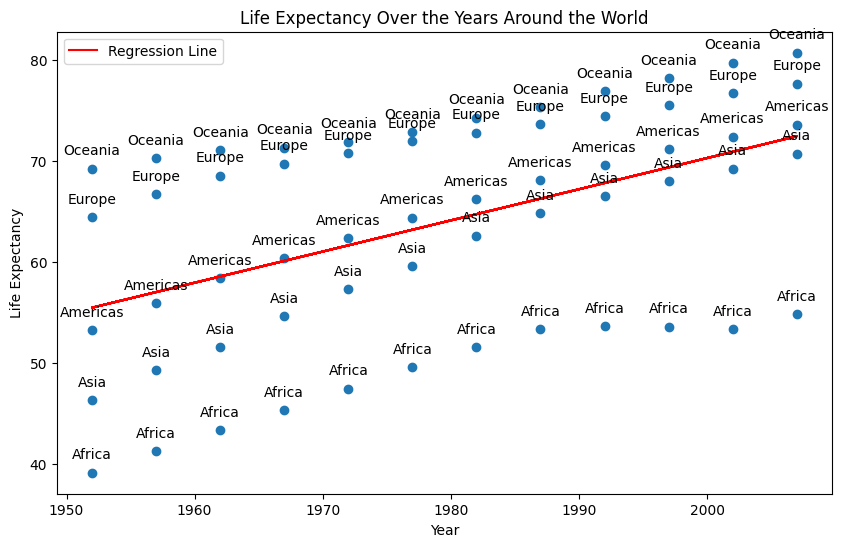

Slope (Year): 0.3085014252302476
Intercept: -546.7147983489472
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     19.08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.24e-05
Time:                        08:37:54   Log-Likelihood:                -218.83
No. Observations:                  60   AIC:                             441.7
Df Residuals:                      58   BIC:                             445.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [6]:
# Group by continent and calculate the mean of life expectancy
grouped_df = df.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['year'], grouped_df['lifeExp'])

# Fit a linear regression model
model = LinearRegression()
model.fit(grouped_df[['year']], grouped_df['lifeExp'])

# Plot the regression line
plt.plot(grouped_df['year'], model.predict(grouped_df[['year']]), color='red', label='Regression Line')

# Add labels for each point
for i in range(len(grouped_df)):
    plt.annotate(grouped_df['continent'].iloc[i], (grouped_df['year'].iloc[i], grouped_df['lifeExp'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Life Expectancy Over the Years Around the World')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

# Display the slope and intercept
print(f'Slope (Year): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# To find the p-value and other statistics 
model = smf.ols(formula="lifeExp ~ year", data=grouped_df).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary to see the statistics
print(summary)

**Question 6**: On average, by how much does life expectancy increase every year around the world? To find the p-value and other statistics, you may use statsmodels.formula.api library. In that library there is a function

On average, life expectancy increases by .308501 per year.

**Question 7**: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

The p-value associated with the coefficient for the 'year' variable is less than 0.05. This suggests that there is a statistically significant relationship between the year and life expectancy. In this case, we would reject the null hypothesis of no relationship between year and life expectancy, and conclude that there is evidence to support a linear relationship between the two variables.

**Exercise 3**: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

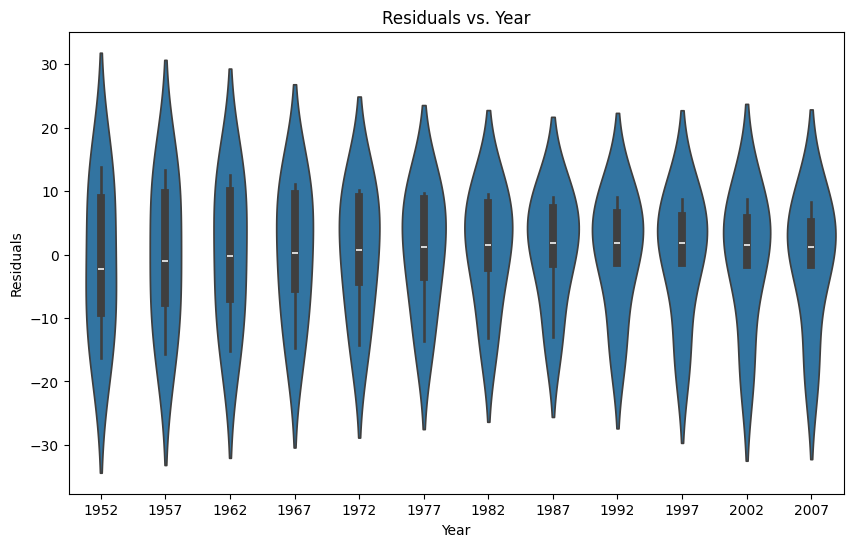

In [7]:
# Calculate residuals
residuals = grouped_df['lifeExp'] - model.predict(grouped_df[['year']])

# Add residuals to grouped_df
grouped_df['residuals'] = residuals

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=grouped_df)
plt.title('Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

**Question 8**:  Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

IDK WHAT GROUP MATE SAID FOR QUESTION 4

**Exercise 4**:  Make a boxplot (or violin plot) of model residuals vs. continent.

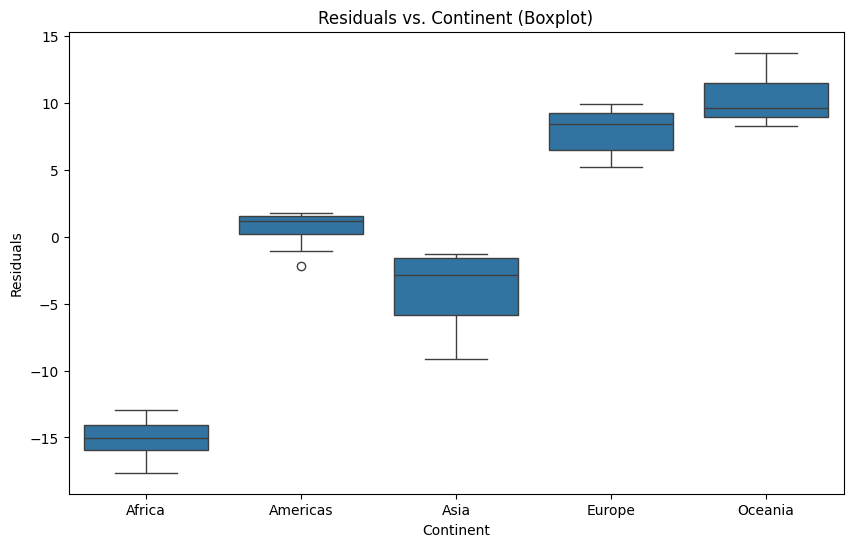

In [8]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='residuals', data=grouped_df)
plt.title('Residuals vs. Continent (Boxplot)')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

**Question 9**:  Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

There is a strong dependence between the model residuals (the differences b/w the observed and predicted values) and 'continent.' This suggests that the linear regression model may not adequately capture the relationship between lifeExp and year for different continents.

**Exercise 5**:  As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

In [9]:
# Create a scatter plot with regression lines
sns.lmplot(x='year', y='lifeExp', data=data, hue='continent', height=6, aspect=1.5, ci=None)
plt.title('Life Expectancy vs. Year (Grouped by Continent)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

NameError: name 'data' is not defined

**Question 10**:  Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, because each continent experienced a positive correlation between lifeExp and Year. It is possible that continent has a statistically significant effect on the relationship. 

**Exercise 6**:  Fit a linear regression model for life expectancy including a term for an interaction between continent and year. You may import statsmodel.formula.api to run ordinary least squares for this. 

In [ ]:
# Fit the linear regression model with interaction term
model = smf.ols(formula="lifeExp ~ year + continent + year:continent", data=data).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary to see the statistics
print(summary)